## Bank Telemarketing Campaign Case Study.

In this case study you’ll be learning Exploratory Data Analytics with the help of a case study on "Bank marketing campaign". This will enable you to understand why EDA is a most important step in the process of Machine Learning.

#### Problem Statement:

 

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate. 

#### Importing the libraries.

In [6]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Importing Dataset

In [7]:
path = os.path.join("Datasets", "Bank Dataset", "bank_marketing_updated_v1.csv")

df1 = pd.read_csv(path)

df1.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


# Data Cleaning 

## # Data Types 

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame. 

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type** 
- **Coordinates type of data**: latitude and longitude type.


#### Read in the Data set. 

In [8]:
#read the dataset skipping first 2 rows.
inp0 = pd.read_csv(path, skiprows=2)

inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


## # Fixing the Rows and Columns 

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately. 
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.


#### Read the file without unnecessary headers.

In [9]:
#print the information of variables to check their data types.
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [10]:
#convert the age variable data type from float to integer.
# inp0['age'] = inp0['age'].astype('int')

#### Dropping customer id column. 

In [11]:
#drop the customer id as it is of no use.
inp0.drop(columns='customerid', axis=1, inplace=True)

inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dividing "jobedu" column into job and education categories. 

In [12]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0['job'] = inp0['jobedu'].apply(lambda x: x.split(',')[0])

inp0.head(3)

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur


In [13]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0['education'] = inp0['jobedu'].apply(lambda x: x.split(',')[1])

inp0.head(3)

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary


In [14]:
#drop the "jobedu" column from the dataframe.
inp0.drop(columns='jobedu', axis=1, inplace=True)

inp0.head(3)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary


## # Impute/Remove missing values 

Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).


#### handling missing values in age column.

In [15]:
#count the missing values in age column.
inp0.age.isnull().sum()

20

In [16]:
#pring the shape of dataframe inp0
inp0.shape

(45211, 19)

In [17]:
#calculate the percentage of missing values in age column.
print(((inp0.age.isnull().sum()/inp0.age.count())*100).round(4))

0.0443


Drop the records with age missing. 

In [18]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
inp1 = inp0[~inp0.age.isnull()]

inp1.shape

(45191, 19)

#### handling missing values in month column

In [19]:
#count the missing values in month column in inp1.
inp1.month.isnull().sum()

50

In [20]:
#print the percentage of each month in the data frame inp1.
inp1.month.value_counts(normalize=True)

month
may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: proportion, dtype: float64

In [21]:
#find the mode of month in inp1
month_mode = inp1.month.mode()[0]
month_mode

'may, 2017'

In [22]:
# fill the missing values with mode value of month in inp1.
inp1.month.fillna(month_mode, inplace=True)

inp1.month.value_counts(normalize=True)

month
may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: proportion, dtype: float64

In [23]:
#let's see the null values in the month column.
inp1.month.isnull().sum()

0

#### handling missing values in response column 

In [24]:
#count the missing values in response column in inp1.
inp1.response.isnull().sum()

30

In [25]:
#calculate the percentage of missing values in response column. 
print(((inp1.response.isnull().sum()/inp1.response.count())*100).round(4))

0.0664


Target variable is better of not imputed.
- Drop the records with missing values.

In [26]:
#drop the records with response missings in inp1.
inp1 = inp1[~inp1.response.isnull()].copy()

In [27]:
inp1.response.isnull().sum()

0

In [28]:
#calculate the missing values in each column of data frame: inp1.
inp1.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

#### handling pdays column. 

In [29]:
#describe the pdays column of inp1.
inp1.pdays.describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values. People that were not contacted earlier.<br>
Missing value does not always be present as null.<br>
How to handle it:

Objective is:
- You should ignore the missing values in the calculations
- We can make it missing - replace -1 with NaN.
- All summary statistics will ignore NaN - mean, median, mode etc.
- we will ignore the missing values of pdays.

In [30]:
# locating all pdays = -1 and replacing it with NaN

inp1.loc[inp1.pdays < 0, 'pdays'] = np.NaN

In [31]:
#describe the pdays column with considering the -1 values.
inp1.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

## # Handling Outliers

In the context of Exploratory Data Analysis (EDA), an outlier is a data point that significantly deviates from the overall pattern of the data. It's a data point that stands out from the rest, often appearing unusually high or low.<br><br>

There are primarily three types of outliers:

1. **Global Outliers (Univariate):**
   - These are data points that deviate significantly from the overall distribution of a dataset.
   - They stand out as anomalies when compared to the entire dataset.
   - There are outliers over a single variable.

2. **Contextual Outliers (Bivariate Anomalies):**
   - These are data points that are considered outliers only within a specific context or condition.
   - These seem like within range when measured with a single variabel in consideration, but are outliers with two or more than two variable in consideration.
   - A data point might be normal within a certain time frame but become an outlier when compared to other time periods.

3. **Collective Outliers (Multivariate):**
   - These are groups of data points that, when considered together, behave differently from the rest of the dataset.
   - They might not be outliers individually but collectively form a distinct pattern.

It's important to note that the distinction between these types can sometimes be subtle, and the categorization might depend on the specific analysis and the chosen outlier detection techniques.

Major approaches to the treat outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable 

In [32]:
#describe the age variable in inp1.
inp1.age.describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

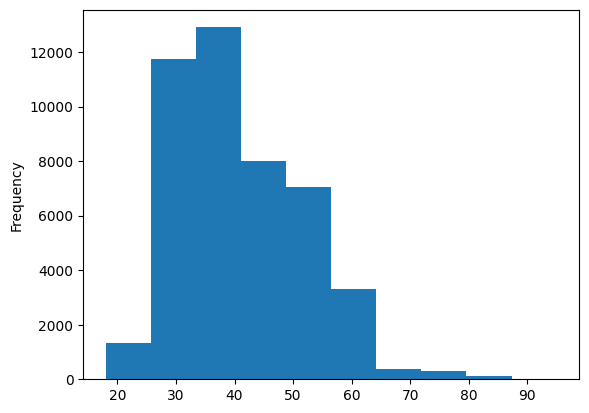

In [33]:
#plot the histogram of age variable.
inp1.age.plot.hist()
plt.show()

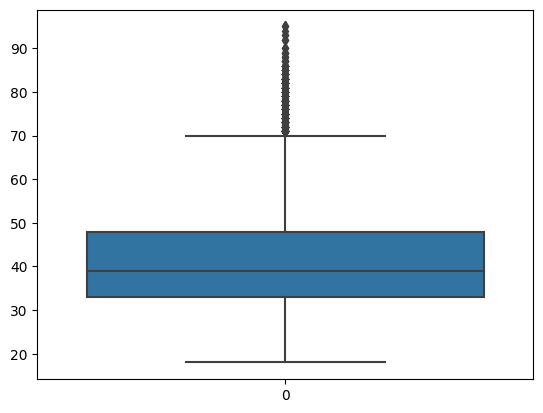

In [34]:
#plot the boxplot of age variable.
sns.boxplot(inp1.age)
plt.show()

In the box plot above the mark above 100 percentile i.e. age 70 seems to have continuous values. Therefore, they cannot be considered as outliers.

#### Salary variable 

In [35]:
#describe the salary variable of inp1.
inp1.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

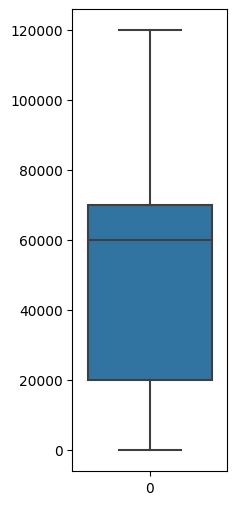

In [36]:
#plot the boxplot of salary variable and find outliers.
plt.figure(figsize=[2, 6])
sns.boxplot(inp1.salary)
plt.show()

#### Balance variable 

In [37]:
#describe the balance variable of inp1.
inp1.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

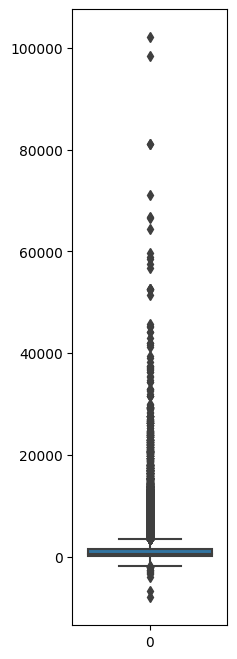

In [38]:
#plot the boxplot of balance variable.
plt.figure(figsize=[2, 8])              # setting figure size
sns.boxplot(inp1.balance)
plt.show()

We can see that there are a lot of outliers, but they are also very conntinuous. Therefore, cannot be dropped.

In [39]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp1.balance.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50      448.0
0.70     1126.0
0.90     3576.0
0.95     5769.0
0.99    13173.4
Name: balance, dtype: float64

This shows that the majority of population is skewed towards left, and the majority of balance amont is skewed towards right.

In [40]:
# Getting a description of users with balance above 99%tile
inp1[inp1.balance > 15000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


Analysing the balance column we can conclude that the balance variable has a lot of outliers but we cannot drop them directly, as they can provide useful insights.<br>What we can do is that we can keep the upper limit in mind for analysis, and exclude values beyond this upper limit in our further analysis.

## # Standardising values

Standardising values means making the values homogenious from an analytical standpoint.<br>
For example, if you receive height data from various sources, the unit of measurement can be different. Mking them same is standardisation.<br>
Another type of standardisation is scaling. For example, to calculate burden of debt the absolute amount of debt is not an accurate indicator. One must also take interest rate into account. Therefore, the burden must be standardised accordingly.<br>
One more type is standerdising precision of numbers.

Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

#### Duration variable

In [41]:
#describe the duration variable of inp1
inp1.duration.describe()

count       45161
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [42]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
inp1.duration = inp1.duration.apply(lambda x: float(x.split()[0])/60 if x.find('sec') else float(x.split()[0]))

In [43]:
#describe the duration variable
inp1.duration.describe()

count    45161.000000
mean         1.387984
std          3.078065
min          0.000000
25%          0.037222
50%          0.083333
75%          1.516667
max         64.683333
Name: duration, dtype: float64

# Univariate Analysis 

## # Categorical unordered univariate analysis 

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


#### Marital status 

In [45]:
#calculate the percentage of each marital status category. 
inp1.marital.describe()

count       45161
unique          3
top       married
freq        27185
Name: marital, dtype: object

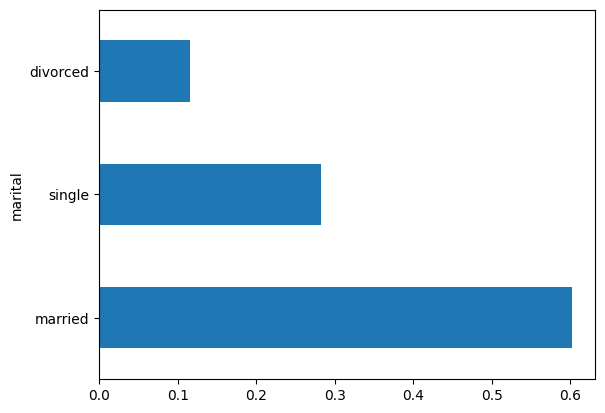

In [48]:
#plot the bar graph of percentage marital status categories
inp1.marital.value_counts(normalize=True).plot.barh()
plt.show()

#### Job  

In [52]:
#calculate the percentage of each job status category.
inp1.job.value_counts(normalize=True)*100

job
blue-collar      21.527424
management       20.927349
technician       16.804322
admin.           11.436859
services          9.184916
retired           5.008746
self-employed     3.485308
entrepreneur      3.286021
unemployed        2.883019
housemaid         2.741303
student           2.077013
unknown           0.637718
Name: proportion, dtype: float64

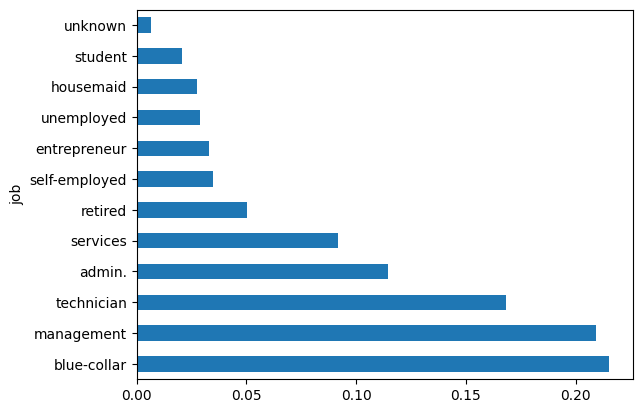

In [53]:
#plot the bar graph of percentage job categories
inp1.job.value_counts(normalize=True).plot.barh()
plt.show()

## # Categorical ordered univariate analysis 

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education

In [57]:
#calculate the percentage of each education category.
inp1.education.value_counts(normalize=True)
plt.show()

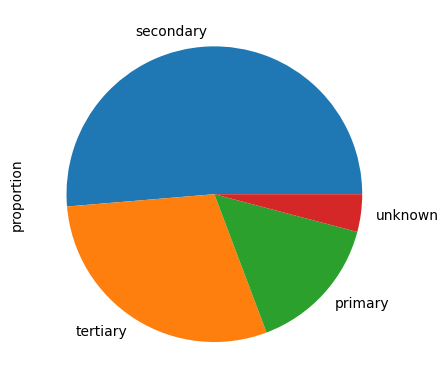

In [58]:
#plot the pie chart of education categories
inp1.education.value_counts(normalize=True).plot.pie()
plt.show()

#### poutcome 

<Axes: ylabel='poutcome'>

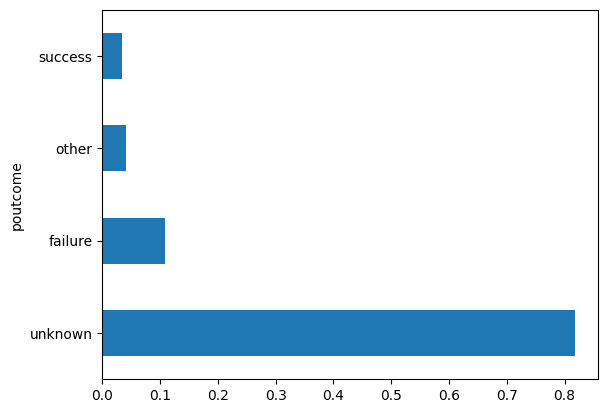

In [63]:
#calculate the percentage of each poutcome category.
inp1.poutcome.value_counts(normalize=True).plot.barh()

<Axes: ylabel='poutcome'>

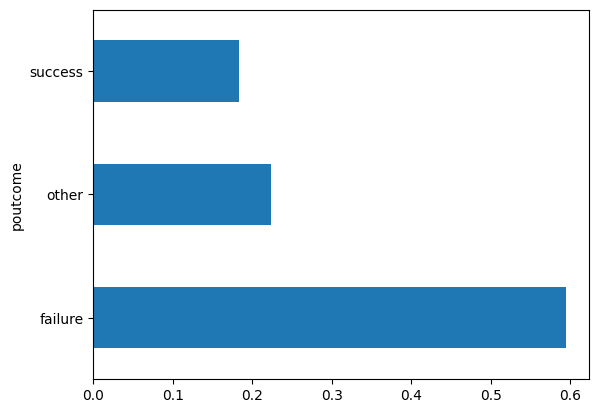

In [65]:
# Plotting a horizontal bar without the unknown catagory.
inp1[~(inp1.poutcome == 'unknown')].poutcome.value_counts(normalize=True).plot.barh()

#### Response the target variable 

In [ ]:
#calculate the percentage of each response category.
inp1.response.value_counts(normalize=True)

response
no     39876
yes     5285
Name: count, dtype: int64

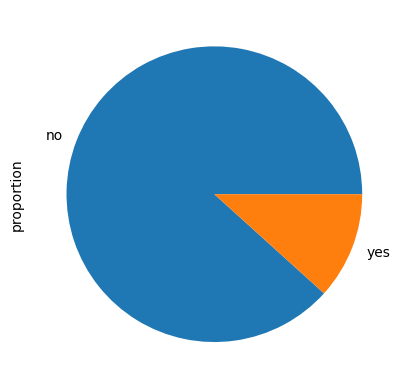

In [67]:
#plot the pie chart of response categories
inp1.response.value_counts(normalize=True).plot.pie()
plt.show()

## Bivariate and Multivariate Analysis

## # Numeric - numeric analysis 

There are three ways to analyse the numeric - numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable. Not practical for multiple variables.
- **Correlation matrix**: To describe the linearity of two numeric variables. Can be achived using a heatmap.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

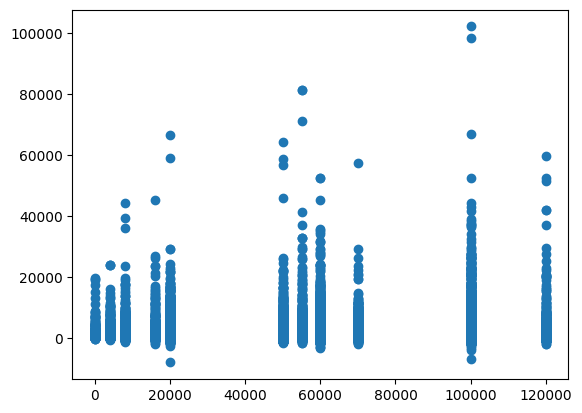

In [68]:
#plot the scatter plot of balance and salary variable in inp1
plt.scatter(inp1.salary, inp1.balance)
plt.show()

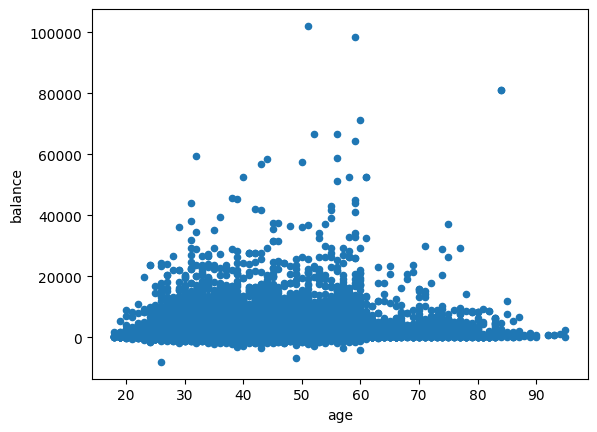

In [69]:
#plot the scatter plot of balance and age variable in inp1
inp1.plot.scatter(x='age', y='balance')
plt.show()

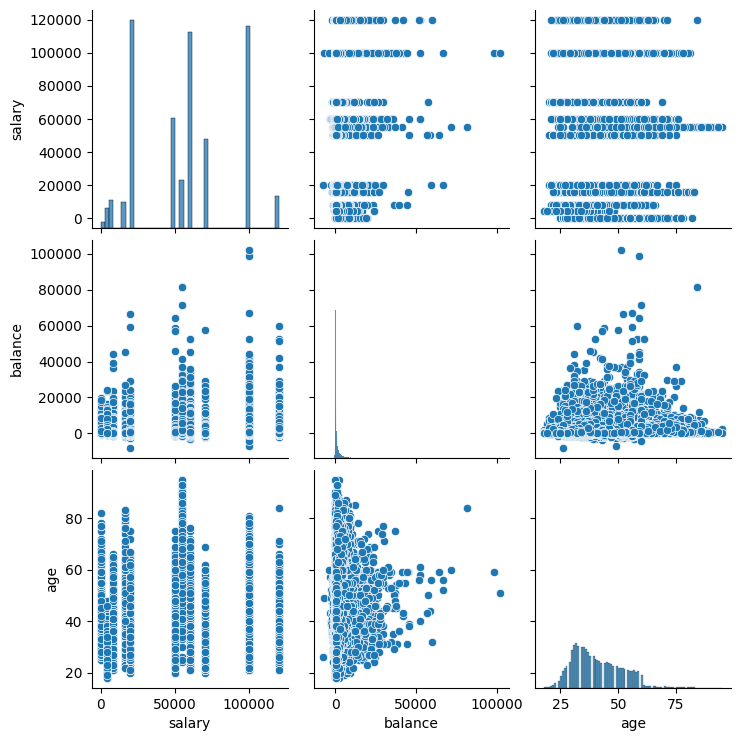

In [70]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data=inp1, vars=['salary', 'balance', 'age'])
plt.show()

#### Correlation heat map 

In [ ]:
# Find corilation between age, salary and balance.

inp1[['age', 'salary', 'balance']].corr()

,age,salary,balance
age,1.000000,0.024513,0.097710
salary,0.024513,1.000000,0.055489
balance,0.097710,0.055489,1.000000


<Axes: >

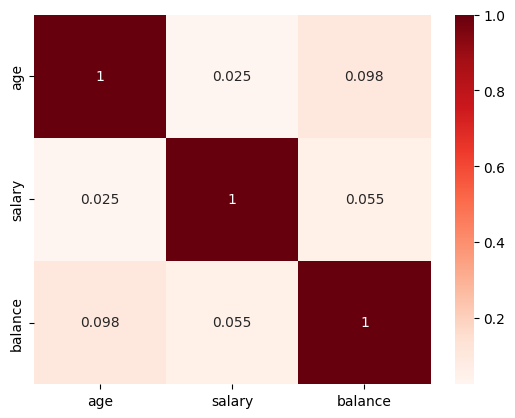

In [ ]:
# plot the correlation matrix of salary, balance and age in inp1 dataframe.

sns.heatmap(inp1[['age', 'salary', 'balance']].corr(), annot=True, cmap='Reds')

## # Numerical categorical variable

#### Salary vs response 

In [74]:
# groupby the response to find the mean of the salary with response no & yes seperatly.
inp1.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [75]:
# groupby the response to find the median of the salary with response no & yes seperatly.
inp1.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

<Axes: xlabel='response', ylabel='salary'>

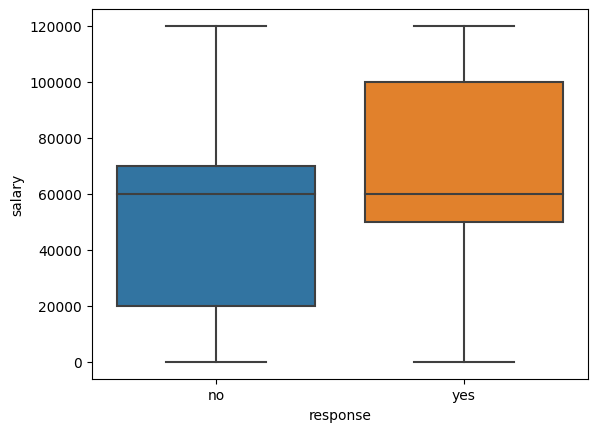

In [76]:
# plot the box plot of salary for yes & no responses.
sns.boxplot(data=inp1, x='response', y='salary')

#### Balance vs response 

<Axes: xlabel='response', ylabel='balance'>

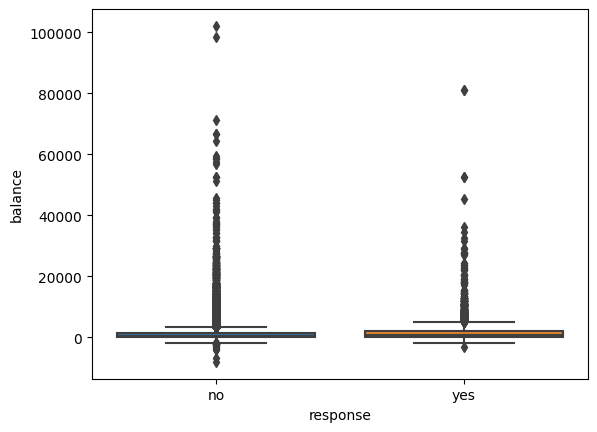

In [77]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(data=inp1, x='response', y='balance')

In [78]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp1.groupby('response')['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [79]:
#groupby the response to find the median of the balance with response no & yes seperatly.
inp1.groupby('response')['balance'].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

##### 75th percentile 

In [80]:
# function to find the 75th percentile.

def p75(x: pd.Series) -> int:
    return np.quantile(x, 0.75)

In [83]:
# calculate the mean, median and 75th percentile of balance with response
inp1.groupby('response')['balance'].aggregate(['mean', 'median', p75])

,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


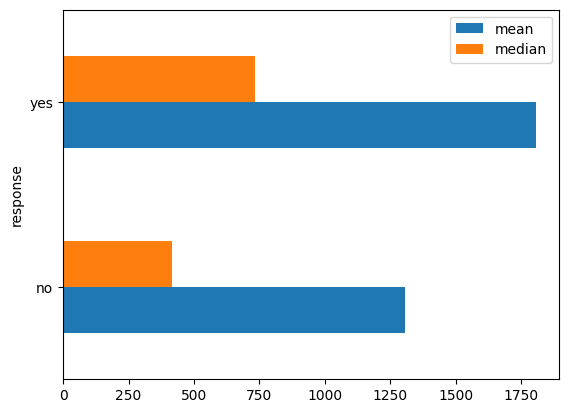

In [84]:
# plot the bar graph of balance's mean an median with response.
inp1.groupby('response')['balance'].aggregate(['mean', 'median']).plot.barh()
plt.show()

#### Education vs salary 

In [85]:
#groupby the education to find the mean of the salary education category.
inp1.groupby('education')['salary'].mean()

education
primary      34232.343910
secondary    49731.449525
tertiary     82880.249887
unknown      46529.633621
Name: salary, dtype: float64

In [86]:
#groupby the education to find the median of the salary for each education category.
inp1.groupby('education')['salary'].median()

education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

#### Job vs salary

In [87]:
#groupby the job to find the mean of the salary for each job category.
inp1.groupby('job')['salary'].mean()

job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

## # Categorical categorical variable

The response variable in the dataset is a string value. For convenience, let's change it to a numerical categorical variable.<br>
To do that we are making use of `np.where()` function. This func takes a condition followed by two outcomes. First for True and second for False.<br>
In the code below, we check for response column. If it's yes, we add 1, if no add 0 as response flag.<br>
The response_flag is then used to calculate the percentage of yes and no i.e. 1 & 0 for a particular group.

In [88]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0

inp1['response_flag'] = np.where(inp1.response=='yes', 1, 0)

#### Education vs response rate

In [ ]:
#calculate the mean of response_flag with different education categories.
inp1.groupby('education')['response_flag'].mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

#### Marital vs response rate 

In [92]:
#calculate the mean of response_flag with different marital status categories.
inp1.groupby('marital')['response_flag'].mean()

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

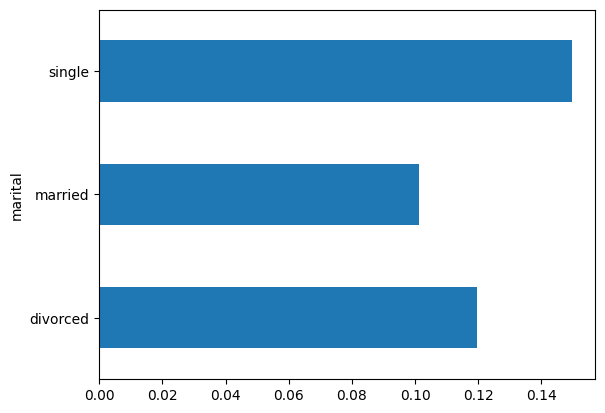

In [94]:
#plot the bar graph of marital status with average value of response_flag
inp1.groupby('marital')['response_flag'].mean().plot.barh()
plt.show()

#### Loans vs response rate 

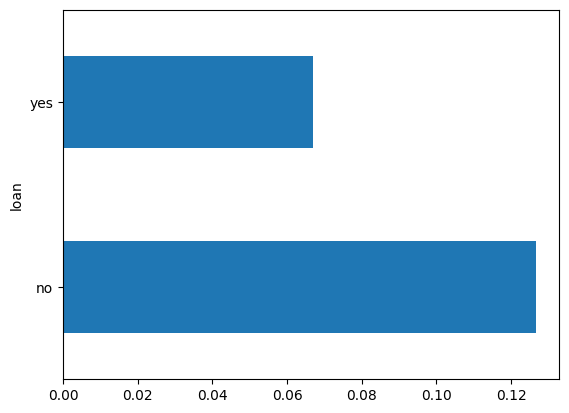

In [96]:
#plot the bar graph of personal loan status with average value of response_flag
inp1.groupby('loan')['response_flag'].mean().plot.barh()
plt.show()

#### Housing loans vs response rate 

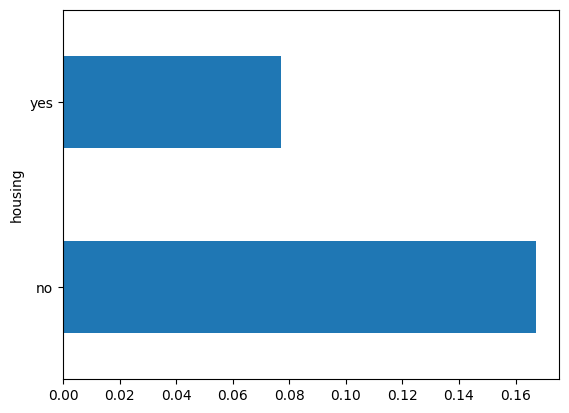

In [97]:
#plot the bar graph of housing loan status with average value of response_flag
inp1.groupby('housing')['response_flag'].mean().plot.barh()
plt.show()

#### Age vs response 

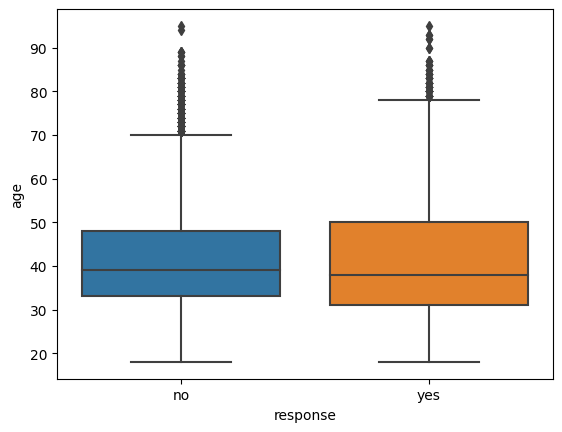

In [101]:
#plot the boxplot of age with response_flag
sns.boxplot(inp1, x='response', y='age')
plt.show()

#### Making buckets from age columns 

In [98]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
?pd.cut

Signature:
pd.cut(
    x,
    bins,
    right: 'bool' = True,
    labels=None,
    retbins: 'bool' = False,
    precision: 'int' = 3,
    include_lowest: 'bool' = False,
    duplicates: 'str' = 'raise',
    ordered: 'bool' = True,
)
Docstring:
Bin values into discrete intervals.

Use `cut` when you need to segment and sort data values into bins. This
function is also useful for going from a continuous variable to a
categorical variable. For example, `cut` could convert ages to groups of
age ranges. Supports binning into an equal number of bins, or a
pre-specified array of bins.

Parameters
----------
x : array-like
    The input array to be binned. Must be 1-dimensional.
bins : int, sequence of scalars, or IntervalIndex
    The criteria to bin by.

    * int : Defines the number of equal-width bins in the range of `x`. The
      range of `x` is extended by .1% on each side to include the minimum
      and maximum values of `x`.
    * sequence of scalars : Defines the bin edges allowing

In [99]:
pd.cut(inp1.age, [0, 30, 40, 50, 60, 999], labels=['<30', '30-40', '40-50', '50-60', '60+'])

0        50-60
1        40-50
2        30-40
3        40-50
4        30-40
         ...  
45206    50-60
45207      60+
45208      60+
45209    50-60
45210    30-40
Name: age, Length: 45161, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

In [100]:
inp1['age_group'] = pd.cut(inp1.age, [0, 30, 40, 50, 60, 999], labels=['<30', '30-40', '40-50', '50-60', '60+'])

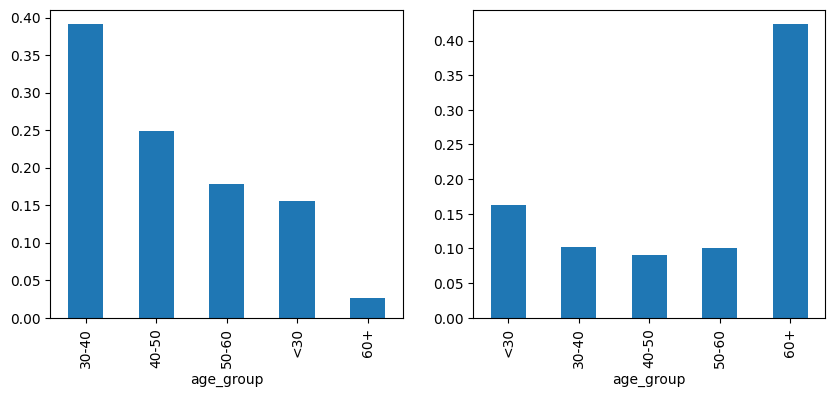

In [103]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1, 2, 1)
inp1.age_group.value_counts(normalize=True).plot.bar()
plt.subplot(1, 2, 2)
inp1.groupby(['age_group'])['response_flag'].mean().plot.bar()
plt.show()

It shows that out of all responders, 60+ consisted of <5%, but responded yes >40% of time.

In [ ]:
#plot the bar graph of job categories with response_flag mean value.


## # Multivariate analysis 

#### Education vs marital vs response 

In [105]:
#create heat map of education vs marital vs response_flag
res = pd.pivot_table(inp1, index='education', columns='marital', values='response_flag')
res

marital,divorced,married,single
education,,,
primary,0.138852,0.075601,0.106808
secondary,0.103559,0.094650,0.129271
tertiary,0.137415,0.129835,0.183737
unknown,0.142012,0.122519,0.162879


<Axes: xlabel='marital', ylabel='education'>

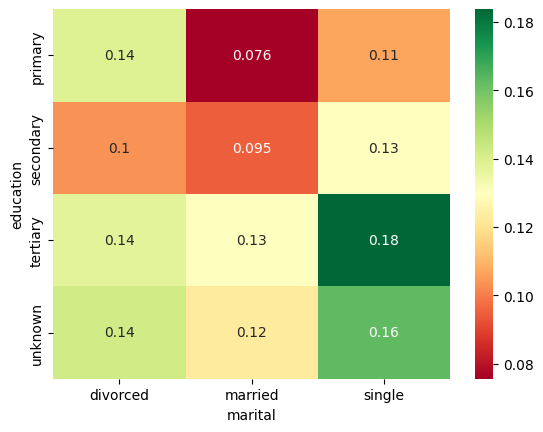

In [110]:
sns.heatmap(res, annot=True, cmap='RdYlGn')

#### Job vs marital vs response 

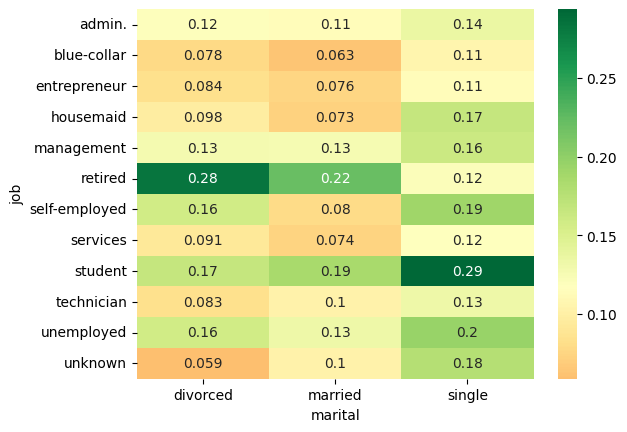

In [113]:
#create the heat map of Job vs marital vs response_flag.
res = pd.pivot_table(inp1, index='job', columns='marital', values='response_flag')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.117)
plt.show()

#### Education vs poutcome vs response

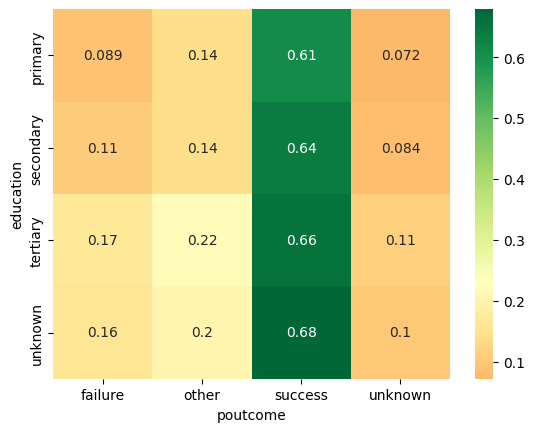

In [118]:
#create the heat map of education vs poutcome vs response_flag.
res = pd.pivot_table(inp1, index='education', columns='poutcome', values='response_flag')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.2308)
plt.show()

In [ ]:
# Finding the average response of only those participants that had previously responded to the survey.
# Add this as center point in the code above.

inp1[inp1.pdays>0].response_flag.mean()

0.2307785593014795